LDA and QDA are two classic classifier, with , as their names suggest, a linear and a quadratic decision surface, repectively.

# 1.2.1. Dimensionality reduction using Linear Discriminant Analysis

**discriminant_analysis.LinearDiscriminantAnalysis** can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the directions which maximize the separation between classes.

## Example

### Comparison of LDA and PCA 2D projection of Iris dataset

explained variance ratio (first two components): [ 0.92461621  0.05301557]


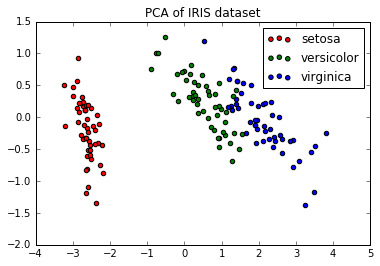

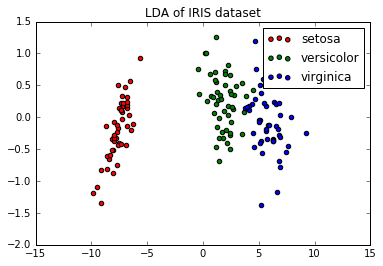

In [61]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Load the iris dataset
iris = datasets.load_iris()

X=iris.data
y=iris.target
target_names = iris.target_names

# Use the PCA model
pca = PCA(n_components = 2)
X_r = pca.fit(X).transform(X)

# Use the LDA model
lda = LinearDiscriminantAnalysis(n_components = 2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' 
     % str(pca.explained_variance_ratio_))

# Plot the diagram
plt.figure()
for c, i, target_name in zip("rgb", [0,1,2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label = target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.figure()
for c, i, target_name in zip("rgb", [0,1,2], target_names):
    plt.scatter(X_r2[y==i, 0], X_r[y==i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

## Exercise

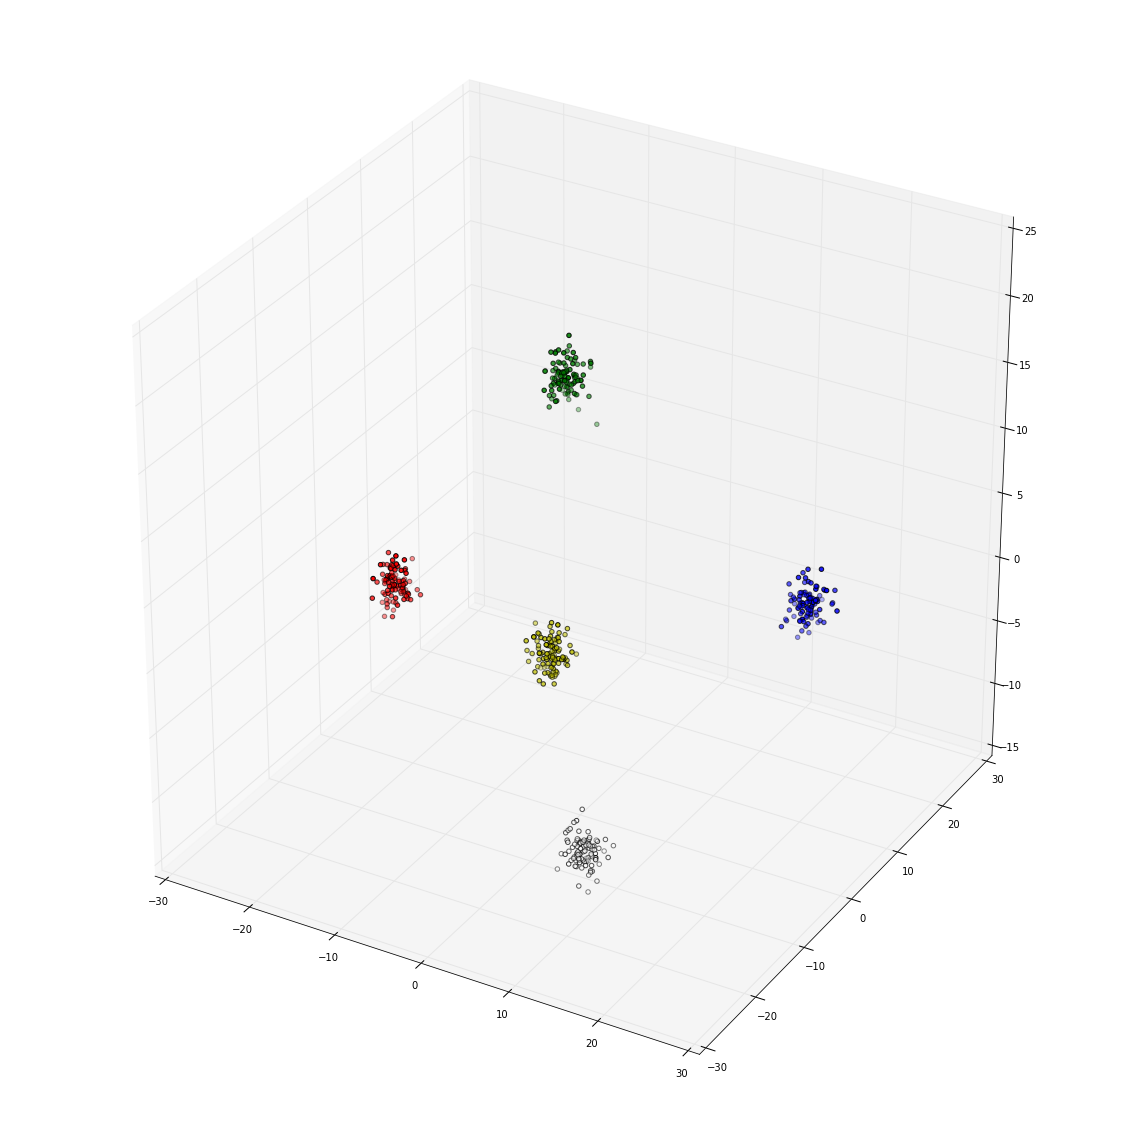

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_features = 20
n_samples = 500

# Generate the data
X, y = make_blobs(n_features = n_features, n_samples=n_samples, centers = 5)

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)

fig = plt.figure(figsize=(20, 20))
ax=fig.add_subplot(111, projection='3d')

for c, i in zip("rgbyw", [0,1,2,3,4]):
    ax.scatter(X_lda[y==i, 0], X_lda[y==i, 1], X_lda[y==i, 2], c=c)

# 1.2.2. Mathematical formulation of the LDA and QDA classifiers

Both LDA and QDA use simple probabilistic models which model the class conditional distribution $P(X\mid y=k)$ for each class $k$. Predictions can then be obtained by using Bayes' rule:

$$P(y=k\mid X)=\dfrac{P(X\mid y=k)P(y=k)}{P(X)}=\dfrac{P(X\mid y=k)P(y=k)}{\sum_l P(X\mid y=l)P(y=l)}$$

and we select the class $k$ which maximizes this conditional probability.

More specifically, for linear and quadratic discriminant analysis, $P(X\mid y)$ is modelled as a multivariate Gaussian distribution with density :

$$p(X\mid y=k) = \dfrac{1}{(2\pi)^{D/2}\left\vert \Sigma_k \right\vert^{1/2}} \exp\Big (-\dfrac{1}{2}(X-\mu_k)^T\Sigma_k^{-1}(X-\mu_k)\Big )$$

To use the above model as a classifier, we just need to estimate from the training data the class pirors $P(y=k)$ (by the proportion of instance of class $k$), the class means $\mu_k$ (by the empirical sample class means) and the covariance matrices (either by the empirical smaple class covariance matrices, or by a regularized estimator : see the section on shrinkage below).

# 1.2.3. Mathematical formulation of LDA dimensionality reduction

# 1.2.4. Shrinkage

## Example

### Normal and Shrinkage Linear Discriminant Analysis for classification

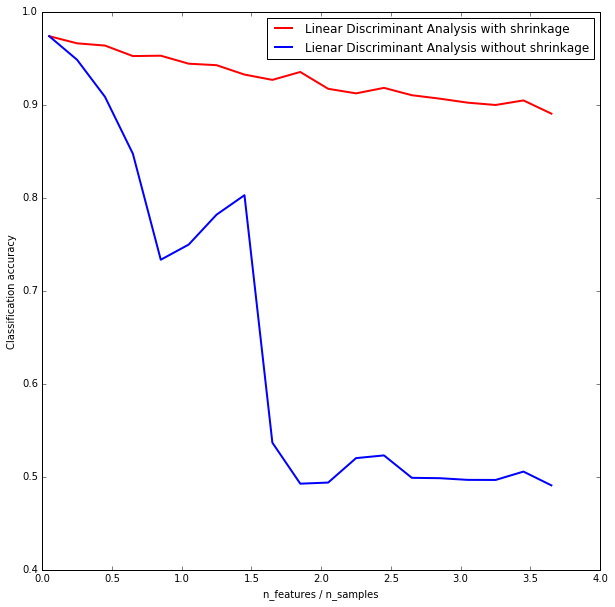

In [33]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_train = 20 
n_test = 200
n_averages =50
n_features_max = 75
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features
    
    This returns an array of input data with shape '(n_samples, n_features)'
    and an array of 'n_samples' target labels.
    
    Only one feature contains discriminative information, the other features
    contain only noise
    """
    X, y = make_blobs(n_samples = n_samples, n_features=1, centers=[[-2], [2]])
    
    # add non-discriminative features
    # 'np.hastack' concatenate 2 array horizontally to make a single array
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features-1)])
    return X, y

acc_lda1, acc_lda2=[], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_lda1, score_lda2=0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)
        
        lda1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X,y)
        lda2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X,y)
        
        X, y = generate_data(n_test, n_features)
        score_lda1 += lda1.score(X,y)
        score_lda2 += lda2.score(X,y)
        
    acc_lda1.append(score_lda1/n_averages)
    acc_lda2.append(score_lda2/n_averages)
    
features_samples_ratio = np.array(n_features_range) / n_train

plt.figure(figsize=(10, 10))

plt.plot(features_samples_ratio, acc_lda1, linewidth = 2,
        label = "Linear Discriminant Analysis with shrinkage", color='r')
plt.plot(features_samples_ratio, acc_lda2, linewidth = 2,
        label = "Lienar Discriminant Analysis without shrinkage", color='b')
plt.legend()
plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')


plt.show()